# <center>Classification and Trend Analysis of the Philosophy according to Era

## 1.1 Introduction

The initial goal of this project was to build a classification model with the data. After all, a book of philosophy represents an effort to systematically organize one's thought about the world. Using the data from the history of philosophy to classify texts would thus enable us to, by proxy, classify how people think about the world. Where some projects focus on sentiment analysis, here we focus on conceptual, or ideological analysis. Once we understand a person's worldview, there is no limit to what we can do with that information - from advertising to political campaigning through to self-exploration and therapy.

## 1.2 The Limitation of Data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
%matplotlib notebook

In [34]:
whole_data=pd.read_csv('philosophy_data.csv')

In [35]:
whole_data.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


In [36]:
time_publication=whole_data['original_publication_date'].value_counts()

<IPython.core.display.Javascript object>


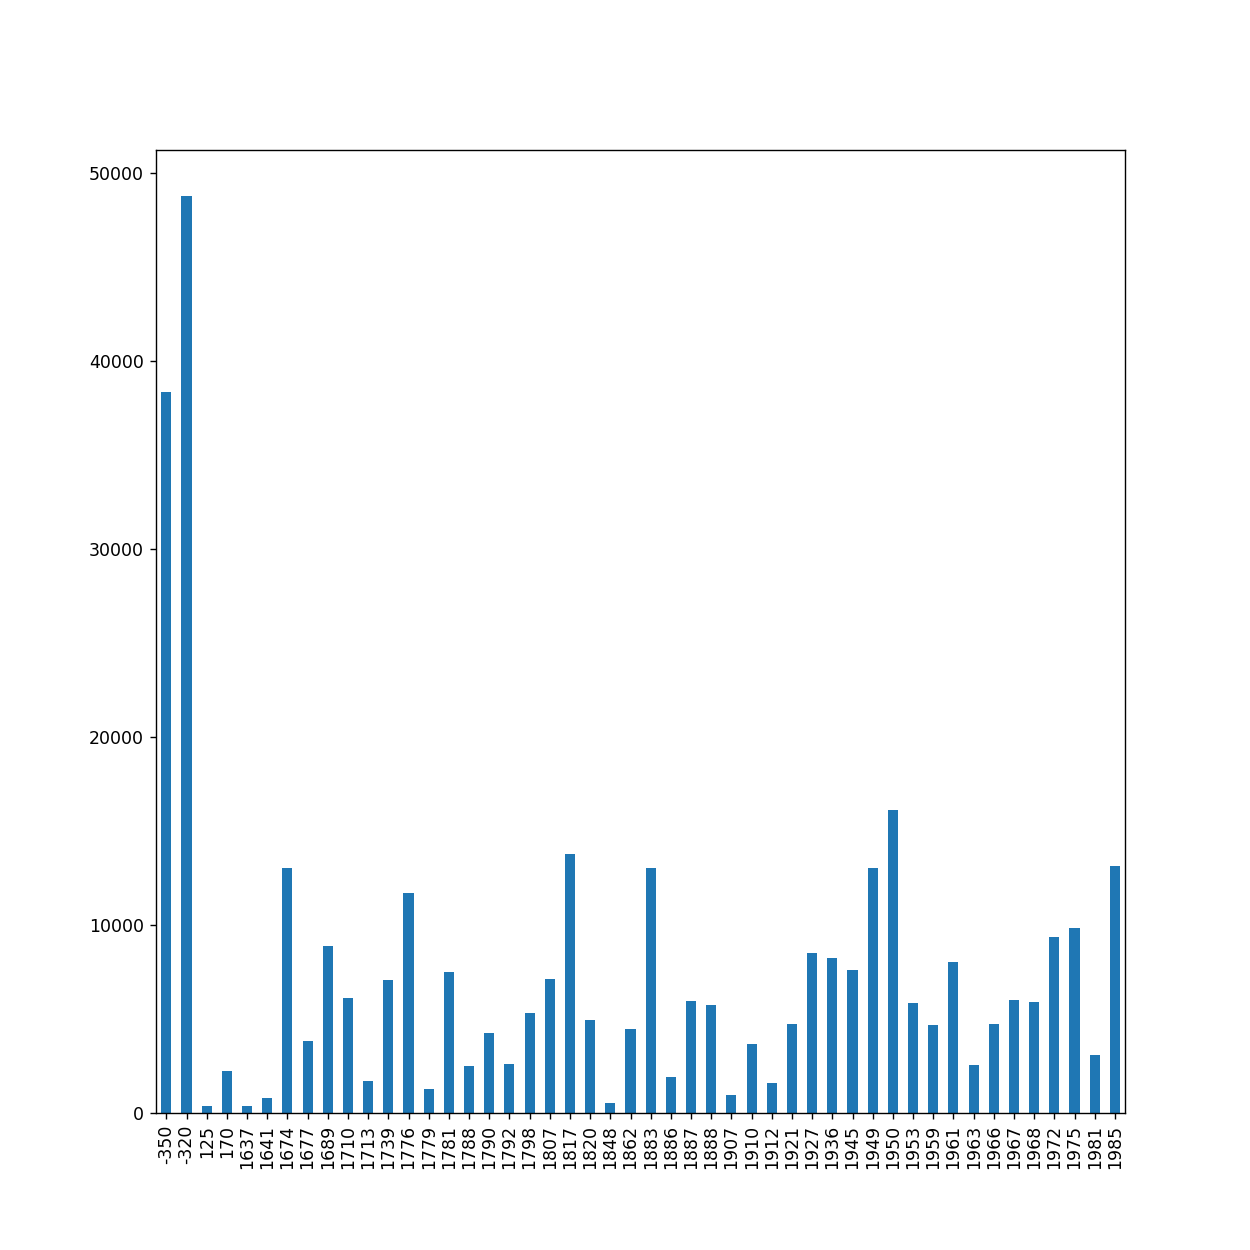

<AxesSubplot:>

In [37]:
plt.figure(figsize=(10,10))
time_publication.sort_index().plot.bar()

We can see there are two chams between -320 year to 125 year and 170 year to 1637 year. So if we analysis the whole data, there will be some discontinuity and thus I decide to analysis data after 1637 year

In [38]:
whole_data=whole_data.set_index('original_publication_date').drop([-350,-320,125,170]).reset_index()

In [39]:
whole_data

,original_publication_date,title,author,school,sentence_spacy,sentence_str,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,1689,Second Treatise On Government,Locke,empiricism,"Reader, thou hast here the beginning and end o...","Reader, thou hast here the beginning and end o...",2010,237,"reader, thou hast here the beginning and end o...","['reader', 'thou', 'hast', 'here', 'the', 'beg...","reader , thou hast here the beginning and end..."
1,1689,Second Treatise On Government,Locke,empiricism,"These, which remain, I hope are sufficient to ...","These, which remain, I hope are sufficient to ...",2010,488,"these, which remain, i hope are sufficient to ...","['these', 'which', 'remain', 'hope', 'are', 's...","these , which remain , -PRON- hope be suffici..."
2,1689,Second Treatise On Government,Locke,empiricism,"If these papers have that evidence, I flatter ...","If these papers have that evidence, I flatter ...",2010,444,"if these papers have that evidence, i flatter ...","['if', 'these', 'papers', 'have', 'that', 'evi...","if these paper have that evidence , -PRON- fl..."
3,1689,Second Treatise On Government,Locke,empiricism,"The king, and body of the nation, have since s...","The king, and body of the nation, have since s...",2010,721,"the king, and body of the nation, have since s...","['the', 'king', 'and', 'body', 'of', 'the', 'n...","the king , and body of the nation , have sinc..."
4,1689,Second Treatise On Government,Locke,empiricism,If he think it not worth while to examine his ...,If he think it not worth while to examine his ...,2010,263,if he think it not worth while to examine his ...,"['if', 'he', 'think', 'it', 'not', 'worth', 'w...",if -PRON- think -PRON- not worth while to exa...
...,...,...,...,...,...,...,...,...,...,...,...
271123,1981,"Women, Race, And Class",Davis,feminism,But the socialization of housework including m...,But the socialization of housework including m...,1981,142,but the socialization of housework including m...,"['but', 'the', 'socialization', 'of', 'housewo...",but the socialization of housework include me...
271124,1981,"Women, Race, And Class",Davis,feminism,The only significant steps toward endingdomest...,The only significant steps toward endingdomest...,1981,117,the only significant steps toward endingdomest...,"['the', 'only', 'significant', 'steps', 'towar...",the only significant step toward endingdomest...
271125,1981,"Women, Race, And Class",Davis,feminism,"Working women, therefore, have a special and v...","Working women, therefore, have a special and v...",1981,90,"working women, therefore, have a special and v...","['working', 'women', 'therefore', 'have', 'spe...","working woman , therefore , have a special an..."
271126,1981,"Women, Race, And Class",Davis,feminism,"Moreover, under capitalism, campaigns for jobs...","Moreover, under capitalism, campaigns for jobs...",1981,199,"moreover, under capitalism, campaigns for jobs...","['moreover', 'under', 'capitalism', 'campaigns...","moreover , under capitalism , campaign for jo..."


<IPython.core.display.Javascript object>


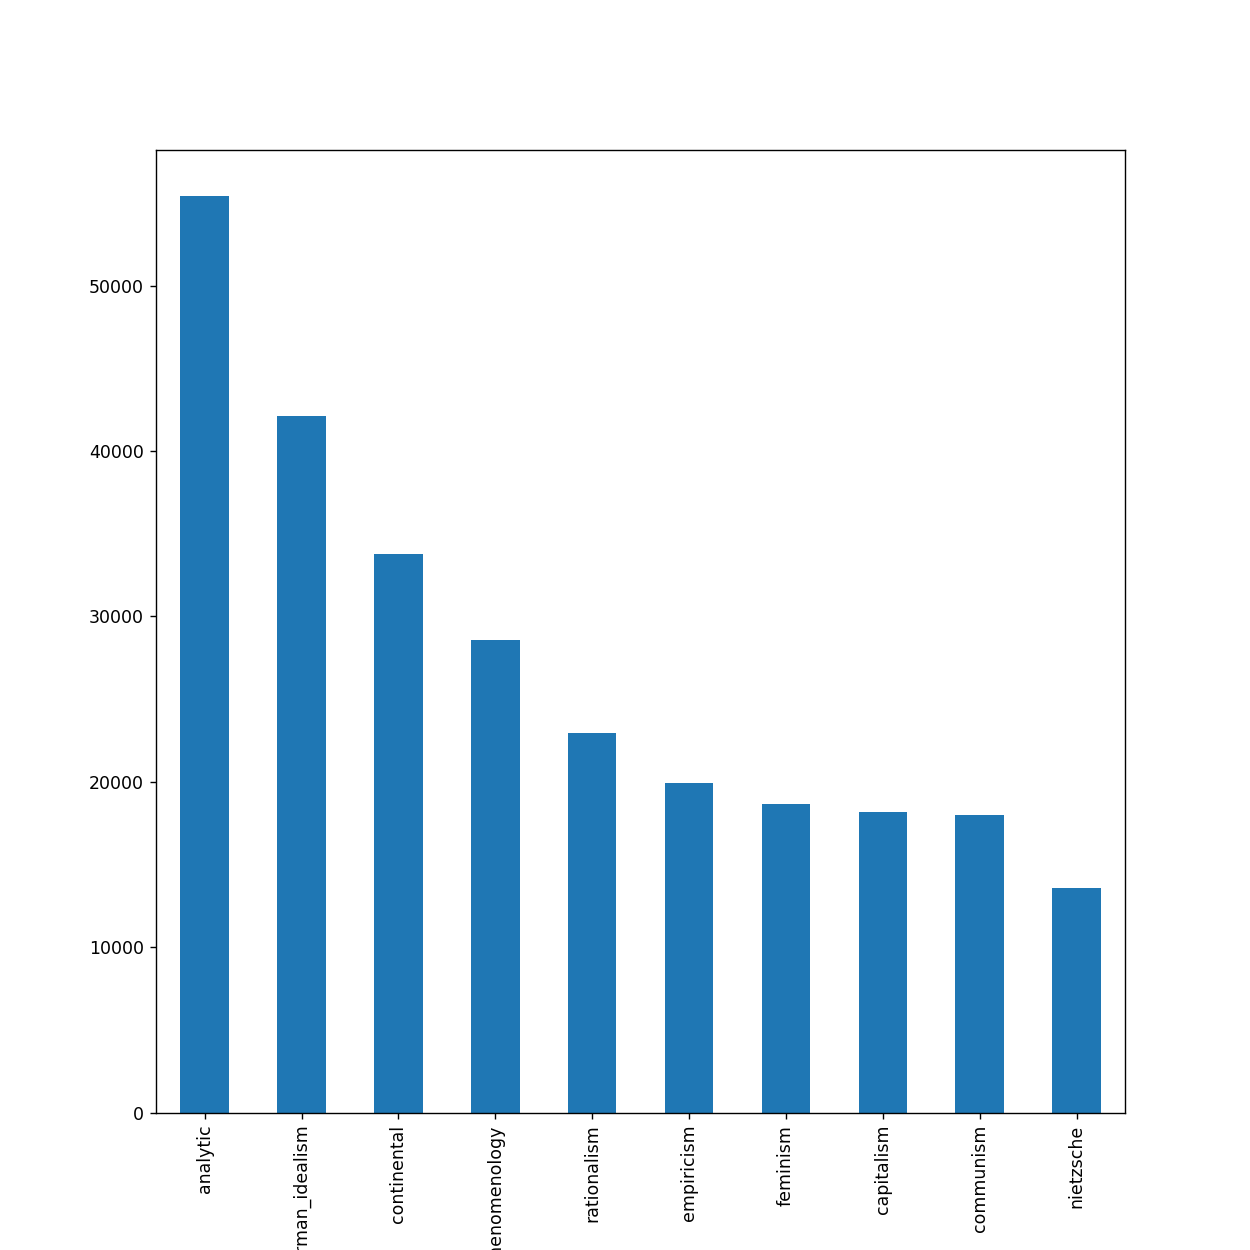

<AxesSubplot:>

In [64]:
fig=plt.figure(figsize=(10,10))
whole_data.school.value_counts().plot.bar()

We can see the data is unbalanced with each phylosophy school's statistical data is unequal. We will be aware of that in the analysis after.

## 1.3 Classification of the Data

In [40]:
import re
def grouped_add(arr):
    added=''
    for part in arr:
        added=added+part
    return added

vctor=whole_data['tokenized_txt'].groupby(whole_data['original_publication_date']).agg(grouped_add)

In [41]:
regex=re.compile('\w+')

In [42]:
vctor_edit=vctor.map(lambda x: regex.findall(x))

In [43]:
vctor_edit

original_publication_date
1637    [if, this, discourse, appear, too, long, to, b...
1641    [to, these, wisest, and, most, distinguished, ...
1674    [the, mind, of, man, is, by, its, na, ure, sit...
1677    [by, that, which, is, self, caused, mean, that...
1689    [reader, thou, hast, here, the, beginning, and...
1710    [philosophy, being, nothing, else, but, it, ma...
1713    [good, morrow, hylas, did, not, expect, to, fi...
1739    [my, design, in, the, present, work, is, suffi...
1776    [the, annual, labour, of, every, nation, is, t...
1779    [it, has, been, remarked, my, that, though, th...
1781    [of, our, own, person, we, will, say, nothing,...
1788    [why, this, critique, is, titled, critique, no...
1790    [the, faculty, of, knowledge, from, priori, pr...
1792    [having, read, with, great, pleasure, pamphlet...
1798    [will, begin, by, characterizing, the, task, o...
1807    [it, is, custo, ary, to, preface, work, with, ...
1817    [what, was, hitherto, called, metaphys

Let us count the number of Every words appears in our phylosophy text and see the most popular 200th words. Maybe that will tell us some information of the phylosophy. 

In [44]:
added=[]
for i in range(len(vctor_edit)):
    added=added+vctor_edit.iloc[i]

In [45]:
added

['if',
 'this',
 'discourse',
 'appear',
 'too',
 'long',
 'to',
 'be',
 'read',
 'at',
 'once',
 'it',
 'may',
 'be',
 'divided',
 'into',
 'six',
 'parts',
 'and',
 'in',
 'the',
 'first',
 'will',
 'be',
 'found',
 'various',
 'considerations',
 'touching',
 'the',
 'sciences',
 'in',
 'the',
 'second',
 'the',
 'principal',
 'rules',
 'of',
 'the',
 'method',
 'which',
 'the',
 'author',
 'has',
 'discovered',
 'in',
 'the',
 'third',
 'certain',
 'of',
 'the',
 'rules',
 'of',
 'morals',
 'which',
 'he',
 'has',
 'deduced',
 'from',
 'this',
 'method',
 'in',
 'the',
 'fourth',
 'the',
 'reasonings',
 'by',
 'which',
 'he',
 'establishes',
 'the',
 'existence',
 'of',
 'god',
 'and',
 'of',
 'the',
 'human',
 'soul',
 'which',
 'are',
 'the',
 'foundations',
 'of',
 'his',
 'metaphysic',
 'in',
 'the',
 'fifth',
 'the',
 'order',
 'of',
 'the',
 'physical',
 'questions',
 'which',
 'he',
 'has',
 'investigated',
 'and',
 'in',
 'particular',
 'the',
 'explication',
 'of',
 'the',


In [46]:
counts=pd.value_counts(added)

In [47]:
counts[:500].to_csv('important.csv')

We can see that most words in 100th are prepositions and Annotations, so it is ok for us to ignore such words and just extend the scope of word acquisition backwards. We will analysis the 100th to 500th words.

In [48]:
words=pd.read_csv('important.csv')

In [49]:
word_100_500=words[100:500]

In [50]:
word_100_500

,Unnamed: 0,0
100,out,7408
101,most,7343
102,could,7265
103,true,7251
104,cannot,7235
...,...,...
495,wages,1505
496,show,1500
497,subjective,1497
498,rise,1490


In [51]:
vctor=pd.DataFrame(np.zeros((len(vctor_edit),400)),columns=word_100_500.iloc[:,0],index=vctor_edit.index)

In [52]:
vctor

Unnamed: 0,out,most,could,true,cannot,since,another,different,every,self,...,whom,rate,clearly,concerning,purpose,wages,show,subjective,rise,proportion
original_publication_date,,,,,,,,,,,,,,,,,,,,,
1637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
vctor_edit

original_publication_date
1637    [if, this, discourse, appear, too, long, to, b...
1641    [to, these, wisest, and, most, distinguished, ...
1674    [the, mind, of, man, is, by, its, na, ure, sit...
1677    [by, that, which, is, self, caused, mean, that...
1689    [reader, thou, hast, here, the, beginning, and...
1710    [philosophy, being, nothing, else, but, it, ma...
1713    [good, morrow, hylas, did, not, expect, to, fi...
1739    [my, design, in, the, present, work, is, suffi...
1776    [the, annual, labour, of, every, nation, is, t...
1779    [it, has, been, remarked, my, that, though, th...
1781    [of, our, own, person, we, will, say, nothing,...
1788    [why, this, critique, is, titled, critique, no...
1790    [the, faculty, of, knowledge, from, priori, pr...
1792    [having, read, with, great, pleasure, pamphlet...
1798    [will, begin, by, characterizing, the, task, o...
1807    [it, is, custo, ary, to, preface, work, with, ...
1817    [what, was, hitherto, called, metaphys

In [54]:
for i in range(44):
    for j in range(400):
        vctor.iloc[i,j]=vctor_edit.iloc[i].count(vctor.columns[j])

In [55]:
vctor

Unnamed: 0,out,most,could,true,cannot,since,another,different,every,self,...,whom,rate,clearly,concerning,purpose,wages,show,subjective,rise,proportion
original_publication_date,,,,,,,,,,,,,,,,,,,,,
1637,20.0,43.0,56.0,33.0,21.0,36.0,13.0,26.0,14.0,3.0,...,17.0,0.0,15.0,0.0,4.0,0.0,8.0,0.0,6.0,4.0
1641,20.0,21.0,64.0,83.0,74.0,77.0,19.0,15.0,5.0,1.0,...,7.0,0.0,64.0,8.0,2.0,0.0,6.0,0.0,0.0,0.0
1674,137.0,546.0,385.0,484.0,810.0,790.0,232.0,548.0,183.0,59.0,...,138.0,6.0,315.0,107.0,28.0,1.0,106.0,0.0,8.0,69.0
1677,37.0,68.0,72.0,168.0,200.0,25.0,206.0,97.0,75.0,61.0,...,26.0,6.0,71.0,68.0,17.0,0.0,56.0,13.0,8.0,96.0
1689,368.0,381.0,288.0,292.0,551.0,291.0,747.0,429.0,422.0,101.0,...,93.0,7.0,45.0,163.0,65.0,1.0,127.0,0.0,23.0,32.0
1710,110.0,235.0,218.0,235.0,280.0,231.0,142.0,84.0,90.0,12.0,...,61.0,0.0,42.0,60.0,30.0,1.0,72.0,0.0,14.0,28.0
1713,35.0,31.0,25.0,31.0,77.0,56.0,29.0,29.0,26.0,3.0,...,2.0,0.0,10.0,10.0,10.0,0.0,1.0,0.0,3.0,3.0
1739,53.0,308.0,11.0,101.0,187.0,215.0,314.0,376.0,509.0,96.0,...,49.0,2.0,22.0,278.0,49.0,0.0,11.0,0.0,89.0,61.0
1776,309.0,700.0,655.0,19.0,224.0,104.0,319.0,839.0,813.0,6.0,...,144.0,207.0,8.0,61.0,102.0,355.0,20.0,0.0,170.0,478.0


We will use pearson method to caculate the relationship between vectors 

In [29]:
corr=vctor.T.corr(method ='pearson')

<IPython.core.display.Javascript object>


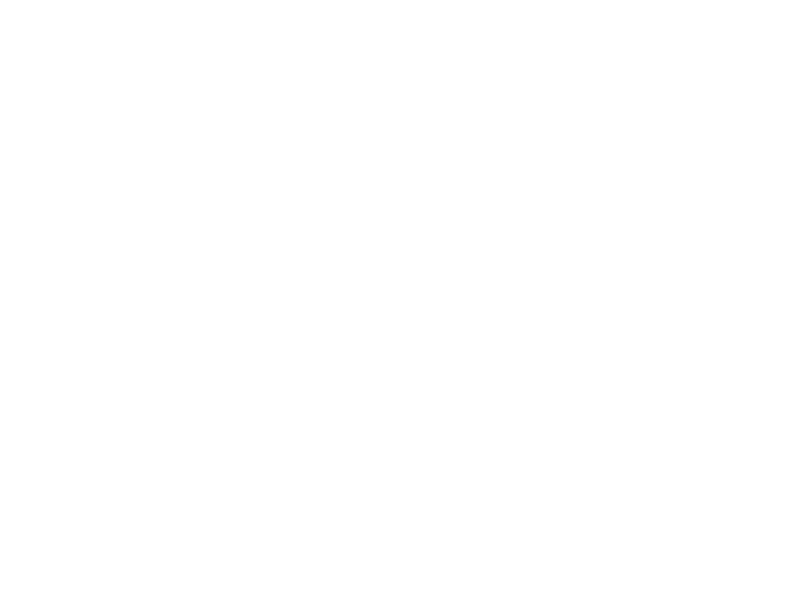

<IPython.core.display.Javascript object>


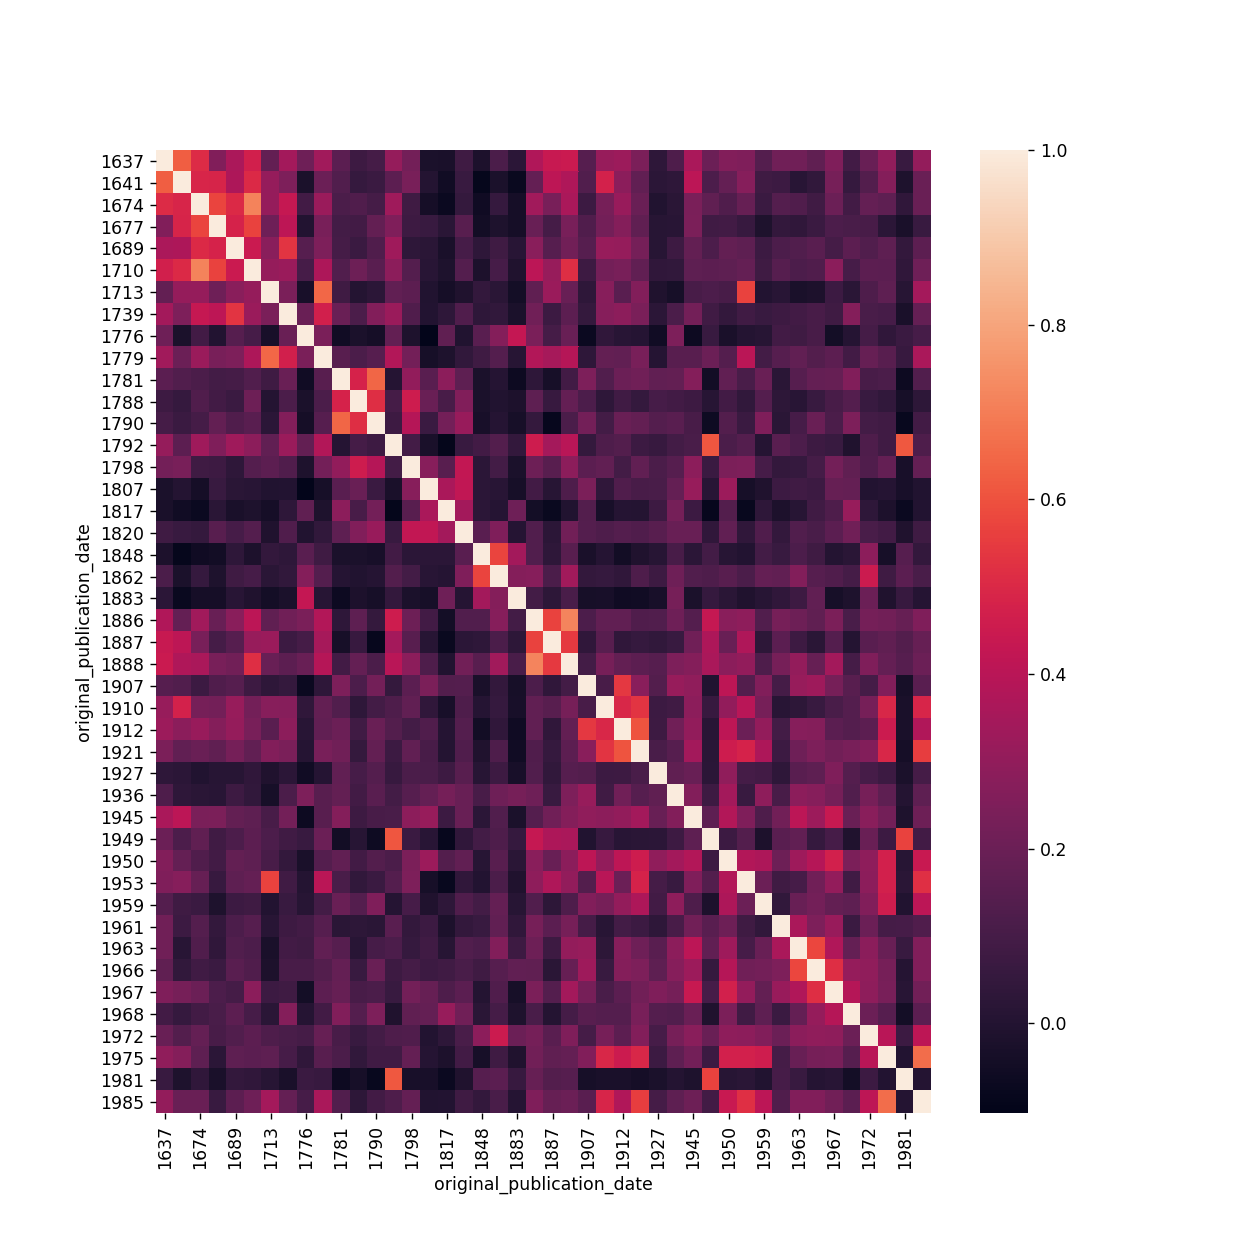

<AxesSubplot:xlabel='original_publication_date', ylabel='original_publication_date'>

In [59]:
fig=plt.figure()
plt.figure(figsize=(10,10))
sns.heatmap(corr)


This heatmap give us the basis for classification. The lighter the color，The greater the degree of similarity between the two vectors. So we can see that the phylosophy of two years are similar.

So we can see that 1637-1641, 1710-1674, 1790-1781, 1981-1949, 1985-1975, 1779-1713's phylosopy idea are most similar. It is easy to see that such similarity is Closely related to year. That means the closer the year, the greater the likelihood of correlation.

In [65]:
whole_data

,original_publication_date,title,author,school,sentence_spacy,sentence_str,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,1689,Second Treatise On Government,Locke,empiricism,"Reader, thou hast here the beginning and end o...","Reader, thou hast here the beginning and end o...",2010,237,"reader, thou hast here the beginning and end o...","['reader', 'thou', 'hast', 'here', 'the', 'beg...","reader , thou hast here the beginning and end..."
1,1689,Second Treatise On Government,Locke,empiricism,"These, which remain, I hope are sufficient to ...","These, which remain, I hope are sufficient to ...",2010,488,"these, which remain, i hope are sufficient to ...","['these', 'which', 'remain', 'hope', 'are', 's...","these , which remain , -PRON- hope be suffici..."
2,1689,Second Treatise On Government,Locke,empiricism,"If these papers have that evidence, I flatter ...","If these papers have that evidence, I flatter ...",2010,444,"if these papers have that evidence, i flatter ...","['if', 'these', 'papers', 'have', 'that', 'evi...","if these paper have that evidence , -PRON- fl..."
3,1689,Second Treatise On Government,Locke,empiricism,"The king, and body of the nation, have since s...","The king, and body of the nation, have since s...",2010,721,"the king, and body of the nation, have since s...","['the', 'king', 'and', 'body', 'of', 'the', 'n...","the king , and body of the nation , have sinc..."
4,1689,Second Treatise On Government,Locke,empiricism,If he think it not worth while to examine his ...,If he think it not worth while to examine his ...,2010,263,if he think it not worth while to examine his ...,"['if', 'he', 'think', 'it', 'not', 'worth', 'w...",if -PRON- think -PRON- not worth while to exa...
...,...,...,...,...,...,...,...,...,...,...,...
271123,1981,"Women, Race, And Class",Davis,feminism,But the socialization of housework including m...,But the socialization of housework including m...,1981,142,but the socialization of housework including m...,"['but', 'the', 'socialization', 'of', 'housewo...",but the socialization of housework include me...
271124,1981,"Women, Race, And Class",Davis,feminism,The only significant steps toward endingdomest...,The only significant steps toward endingdomest...,1981,117,the only significant steps toward endingdomest...,"['the', 'only', 'significant', 'steps', 'towar...",the only significant step toward endingdomest...
271125,1981,"Women, Race, And Class",Davis,feminism,"Working women, therefore, have a special and v...","Working women, therefore, have a special and v...",1981,90,"working women, therefore, have a special and v...","['working', 'women', 'therefore', 'have', 'spe...","working woman , therefore , have a special an..."
271126,1981,"Women, Race, And Class",Davis,feminism,"Moreover, under capitalism, campaigns for jobs...","Moreover, under capitalism, campaigns for jobs...",1981,199,"moreover, under capitalism, campaigns for jobs...","['moreover', 'under', 'capitalism', 'campaigns...","moreover , under capitalism , campaign for jo..."


## 1.3 The trend of phylosophy

In [74]:
columns=whole_data.school.unique()
index=whole_data.original_publication_date.sort_values().unique()

In [75]:
columns,index

(array(['empiricism', 'rationalism', 'analytic', 'continental',
        'phenomenology', 'german_idealism', 'communism', 'capitalism',
        'nietzsche', 'feminism'], dtype=object),
 array([1637, 1641, 1674, 1677, 1689, 1710, 1713, 1739, 1776, 1779, 1781,
        1788, 1790, 1792, 1798, 1807, 1817, 1820, 1848, 1862, 1883, 1886,
        1887, 1888, 1907, 1910, 1912, 1921, 1927, 1936, 1945, 1949, 1950,
        1953, 1959, 1961, 1963, 1966, 1967, 1968, 1972, 1975, 1981, 1985],
       dtype=int64))

In [77]:
trend_matrix=pd.DataFrame(np.zeros((len(index),len(columns))),index=index,columns=columns)

In [102]:
for i in range(len(index)):
    for j in range(len(columns)):
        try:
            trend_matrix.iloc[i,j]=whole_data[whole_data.original_publication_date==index[i]]['school'].value_counts()[columns[j]]
        except KeyError:
            trend_matrix.iloc[i,j]=0
            

In [103]:
trend_matrix

,empiricism,rationalism,analytic,continental,phenomenology,german_idealism,communism,capitalism,nietzsche,feminism
1637,0.0,340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,0.0,792.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1674,0.0,12997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1677,0.0,3793.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1689,8885.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1710,1040.0,5027.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1713,1694.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1739,7047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11693.0,0.0,0.0
1779,1265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


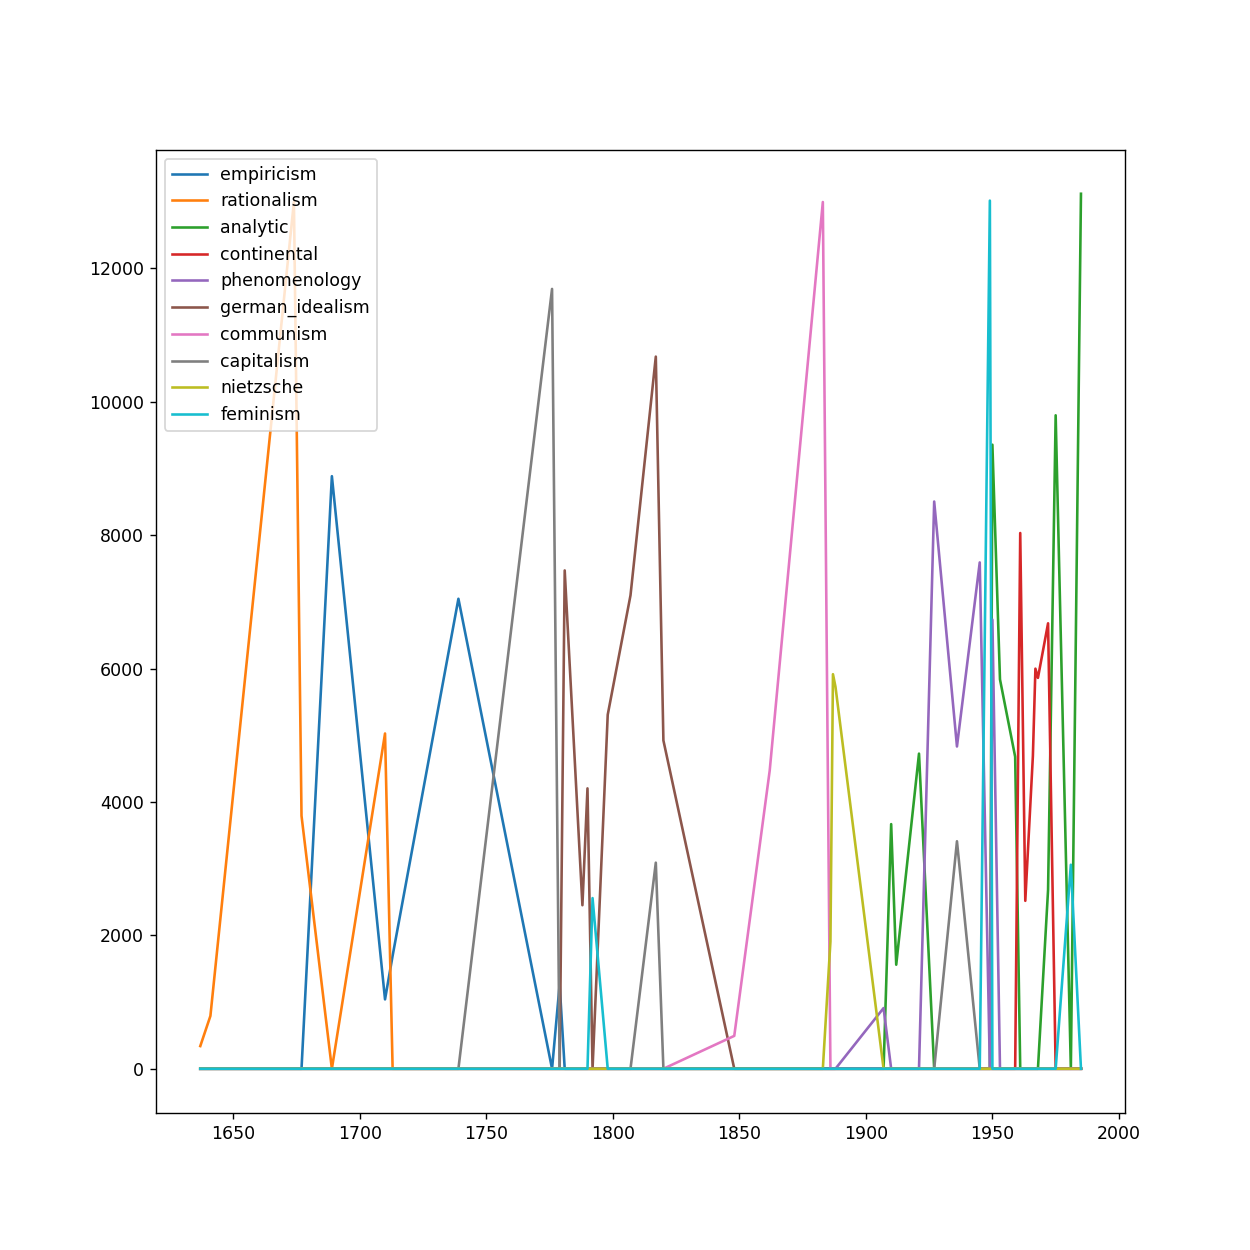

<AxesSubplot:>

In [111]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
trend_matrix.plot(ax=ax)

Ws can conclude that the most popular phylosophy school are analytics, but it just appear in recent 20th centry and from the graph we can also know that every phylosophy school has its own golden era and every era has its own pthlosophy trend. There are no No philosophical school that can last forever.

In the following section, I will do some data analysis on the particular phylosophy school to see more information

## 1.4 Analysis of Analytic School

<IPython.core.display.Javascript object>


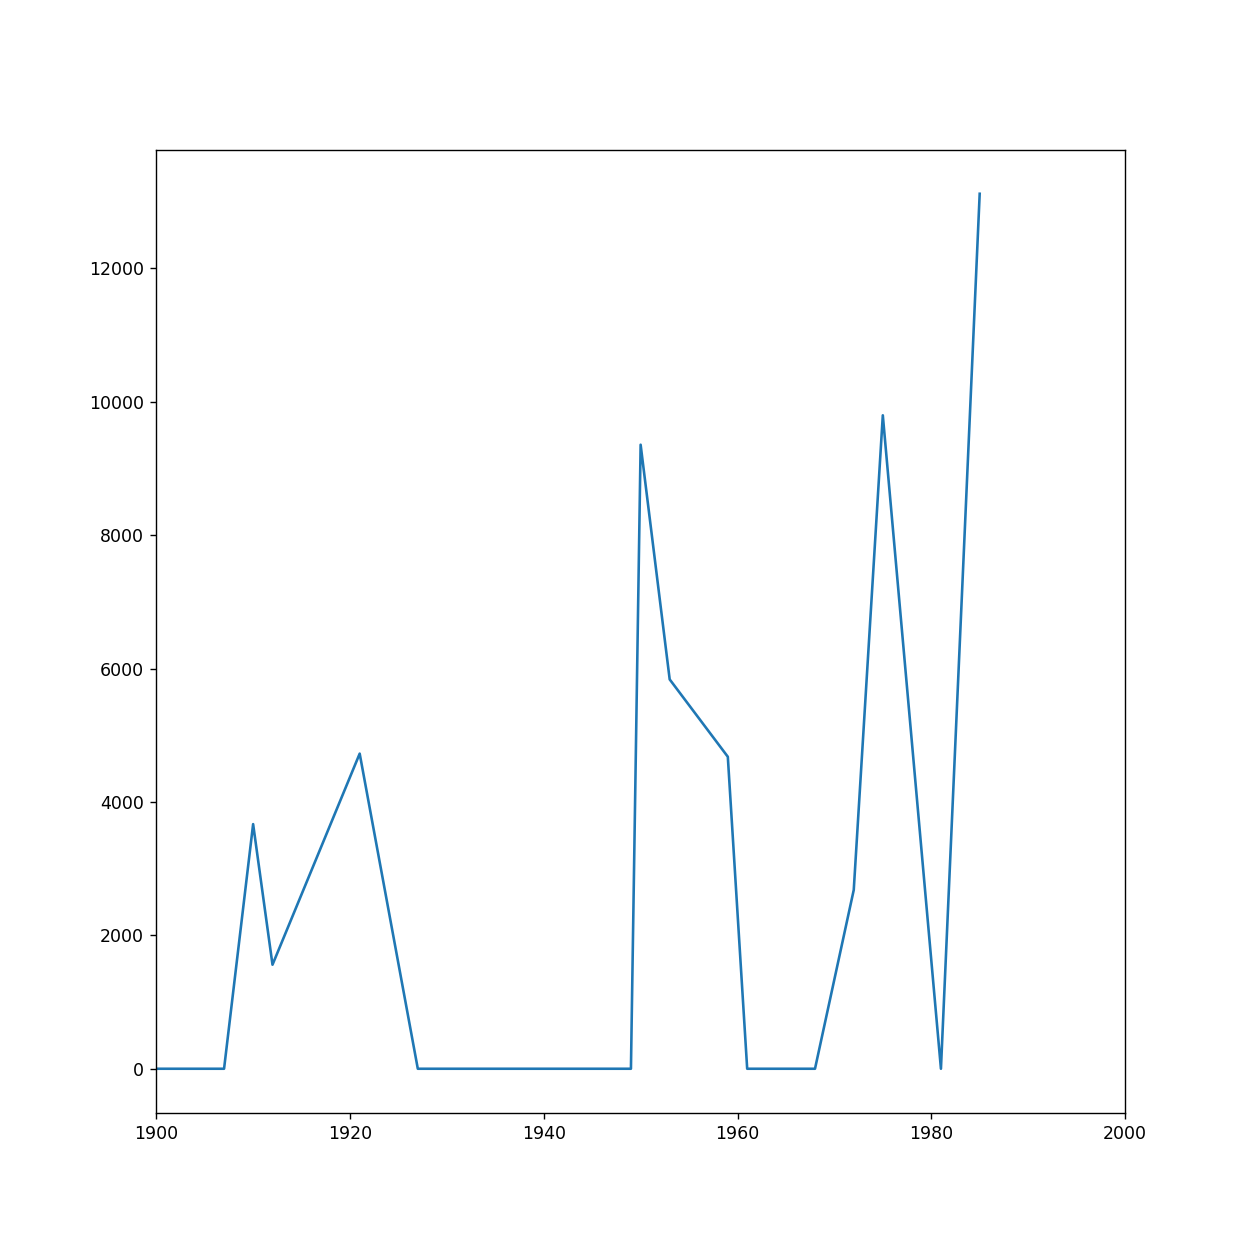

(1900.0, 2000.0)

In [116]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
trend_matrix.analytic.plot(ax=ax)
ax.set_xlim([1900,2000])

In [119]:
analytic_data=whole_data[whole_data.school=='analytic']

From 1900s, the modern phylosophy enter the era called 'Analytic Era'. In this era, Russell	published 'The Analysis Of Mind', Wittgenstein wirted 'On Certainty'. And I want to know the most popular topic in such publications.

In [127]:
import re
regex=re.compile('\w+')
def word_out(arr):
    added=[]
    for part in arr:
        added=added+regex.findall(part)
    return added
    
    
grouped=analytic_data['tokenized_txt'].groupby(analytic_data['title']).agg(word_out)

In [128]:
grouped

title
Lewis - Papers                       [here, misprints, apart, they, are, reprinted,...
Naming And Necessity                 [originally, had, intended, to, revise, or, au...
On Certainty                         [if, you, do, know, that, here, is, one, hand,...
Philosophical Investigations         [these, words, it, seems, to, me, give, us, pa...
Philosophical Studies                [all, the, papers, contained, in, this, volume...
Philosophical Troubles               [problem, which, has, arisen, frequently, in, ...
Quintessence                         [less, science, advanced, more, its, terminolo...
The Analysis Of Mind                 [this, book, has, grown, out, of, an, attempt,...
The Logic Of Scientific Discovery    [in, my, old, of, tried, to, explain, too, bri...
The Problems Of Philosophy           [have, confined, myself, in, the, main, to, th...
Tractatus Logico-Philosophicus       [and, whatever, man, knows, whatever, is, not,...
Name: tokenized_txt, dtype: object

<IPython.core.display.Javascript object>


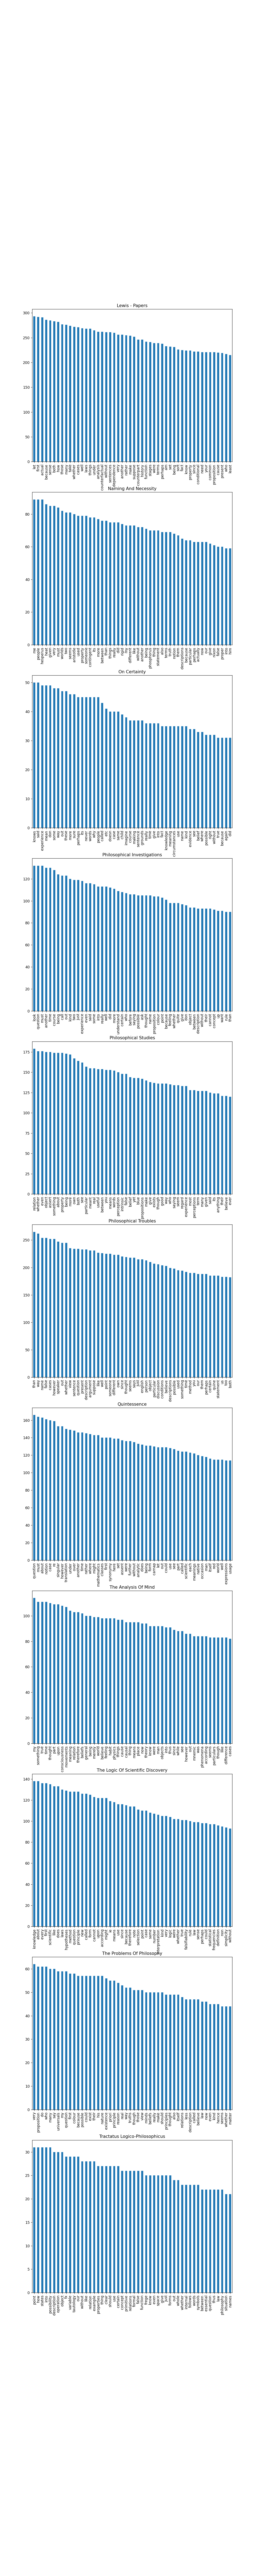

In [140]:
fig=plt.figure(figsize=(10,100))
axes=fig.subplots(11,1)
for i in range(11):
    pd.Series(grouped.iloc[i]).value_counts().iloc[100:150].plot.bar(ax=axes[i])
    axes[i].set_title(grouped.index[i])

So we can see the most popular subjects studied in the analytic school.